In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Data preprocessing

In [11]:
# load dataset
df = pd.read_csv('Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [12]:
# checking for missing values
print(f"Missing values: \n{df.isna().sum()}")
print (f"Duplicatis = {df.duplicated().sum()}")

Missing values: 
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


If there were missing values, we have to fill or remove.

In [13]:
# Binary encoding
binary_columns = ["Extracurricular Activities"]

for col in binary_columns:
    df[col] = df[col].map({"Yes": 0, "No": 1})
    
df.head()    

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,0,9,1,91.0
1,4,82,1,4,2,65.0
2,8,51,0,7,2,45.0
3,5,52,0,5,2,36.0
4,7,75,1,8,5,66.0


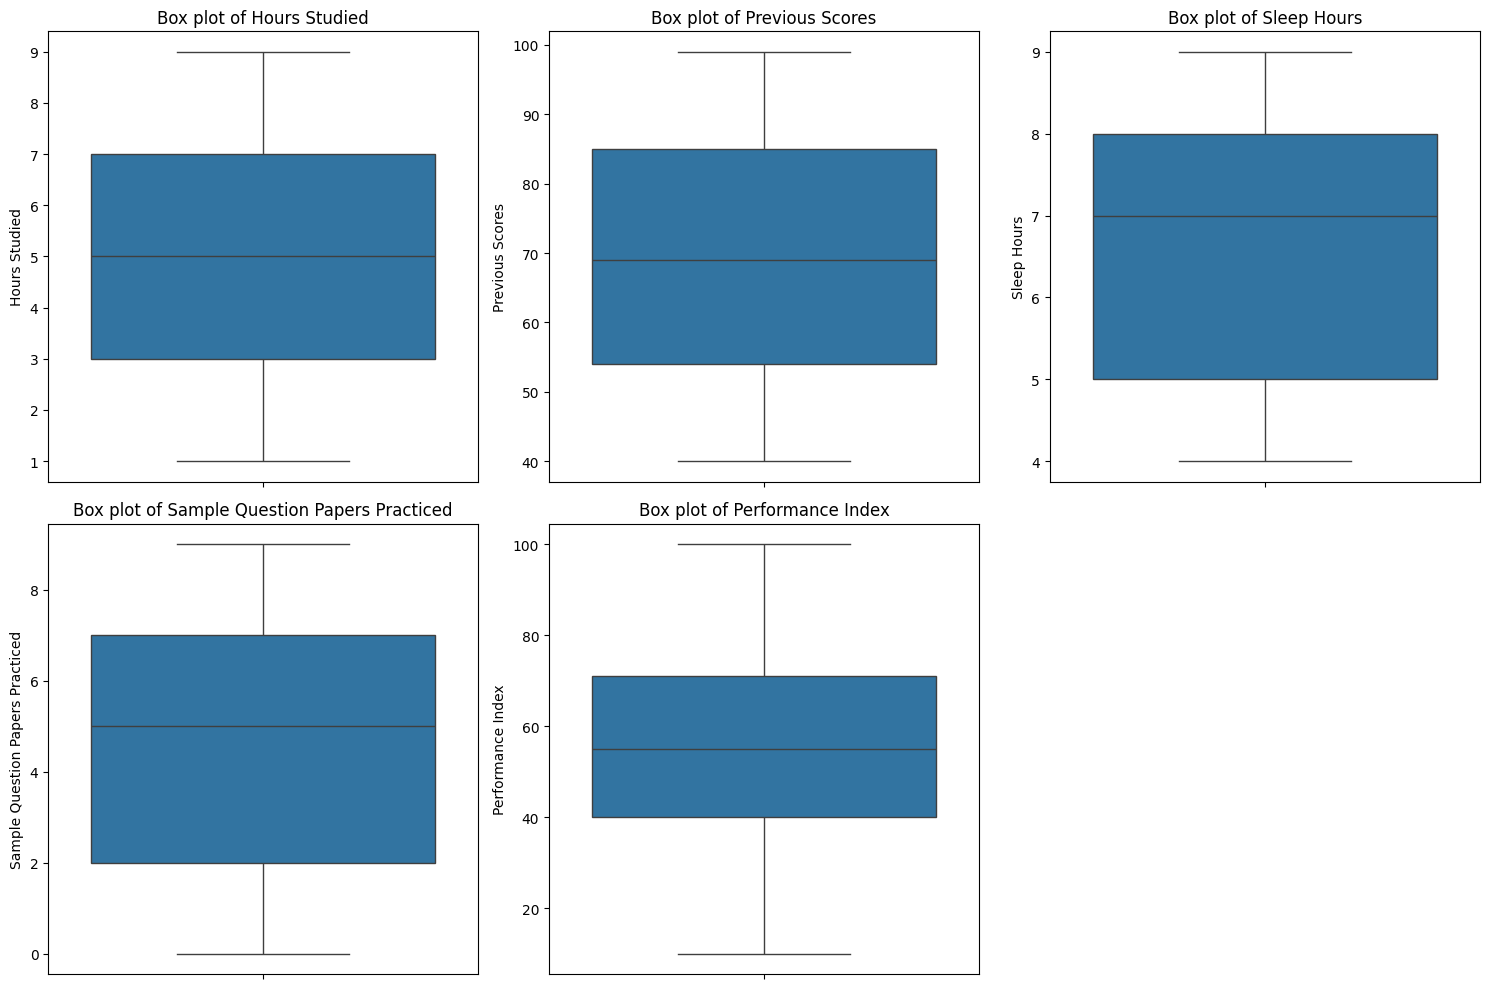

In [14]:
# checking for outliers
numerical_columns = [
    "Hours Studied",
    "Previous Scores",
    "Sleep Hours",
    "Sample Question Papers Practiced",
    "Performance Index",
]

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f"Box plot of {col}")

plt.tight_layout()
plt.savefig('Student_performance_box_plots.png')    
plt.show()

If outliers were present we have to remove them 

# Prepare data to feed the model

In [35]:
# separate features(X) and target variable(y)
X = df.drop("Performance Index", axis=1)
y = df["Performance Index"]

# split data for train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# feature scaling
scaler = StandardScaler()

# Scaling ensures that all features contribute equally to the model 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled[0:7])

[[ 0.00645547 -1.18384439  0.98930717  0.26988848  0.13404112]
 [-1.14974745 -1.24150571 -1.01080841  0.26988848  0.48356164]
 [-1.14974745  0.66131759  0.98930717  0.26988848 -0.91452044]
 [-1.14974745 -1.35682833  0.98930717 -0.31890558 -1.26404096]
 [ 1.16265838 -1.29916702  0.98930717  1.4474766  -1.61356148]
 [-0.76434648 -0.78021521  0.98930717 -1.49649371 -0.2154794 ]
 [-0.76434648 -1.06852177 -1.01080841 -1.49649371 -1.26404096]]


# Train the model

In [18]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

# Predict using model

In [20]:
# predict target variable using both train and test data 
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

In [21]:
# calculate root mean squared error(rmse) for train and test data
# RMSE measures the average prediction error (in the same unit as the target variable
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# calculate R-squared(R2) score for train and test data
# R² measures how much of the variance in the target is explained by the model.
# R² = 1 => perfect prediction
# R² = 0 => model does no better than predicting the mean
# R² < 0 => model is worse than just using the mean

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Model performance: \n")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Train R2 score: {train_r2:.2f}")
print(f"Test R2 score: {test_r2:.2f}")


Model performance: 

Train RMSE: 2.04
Test RMSE: 2.02
Train R2 score: 0.99
Test R2 score: 0.99


# Visualization

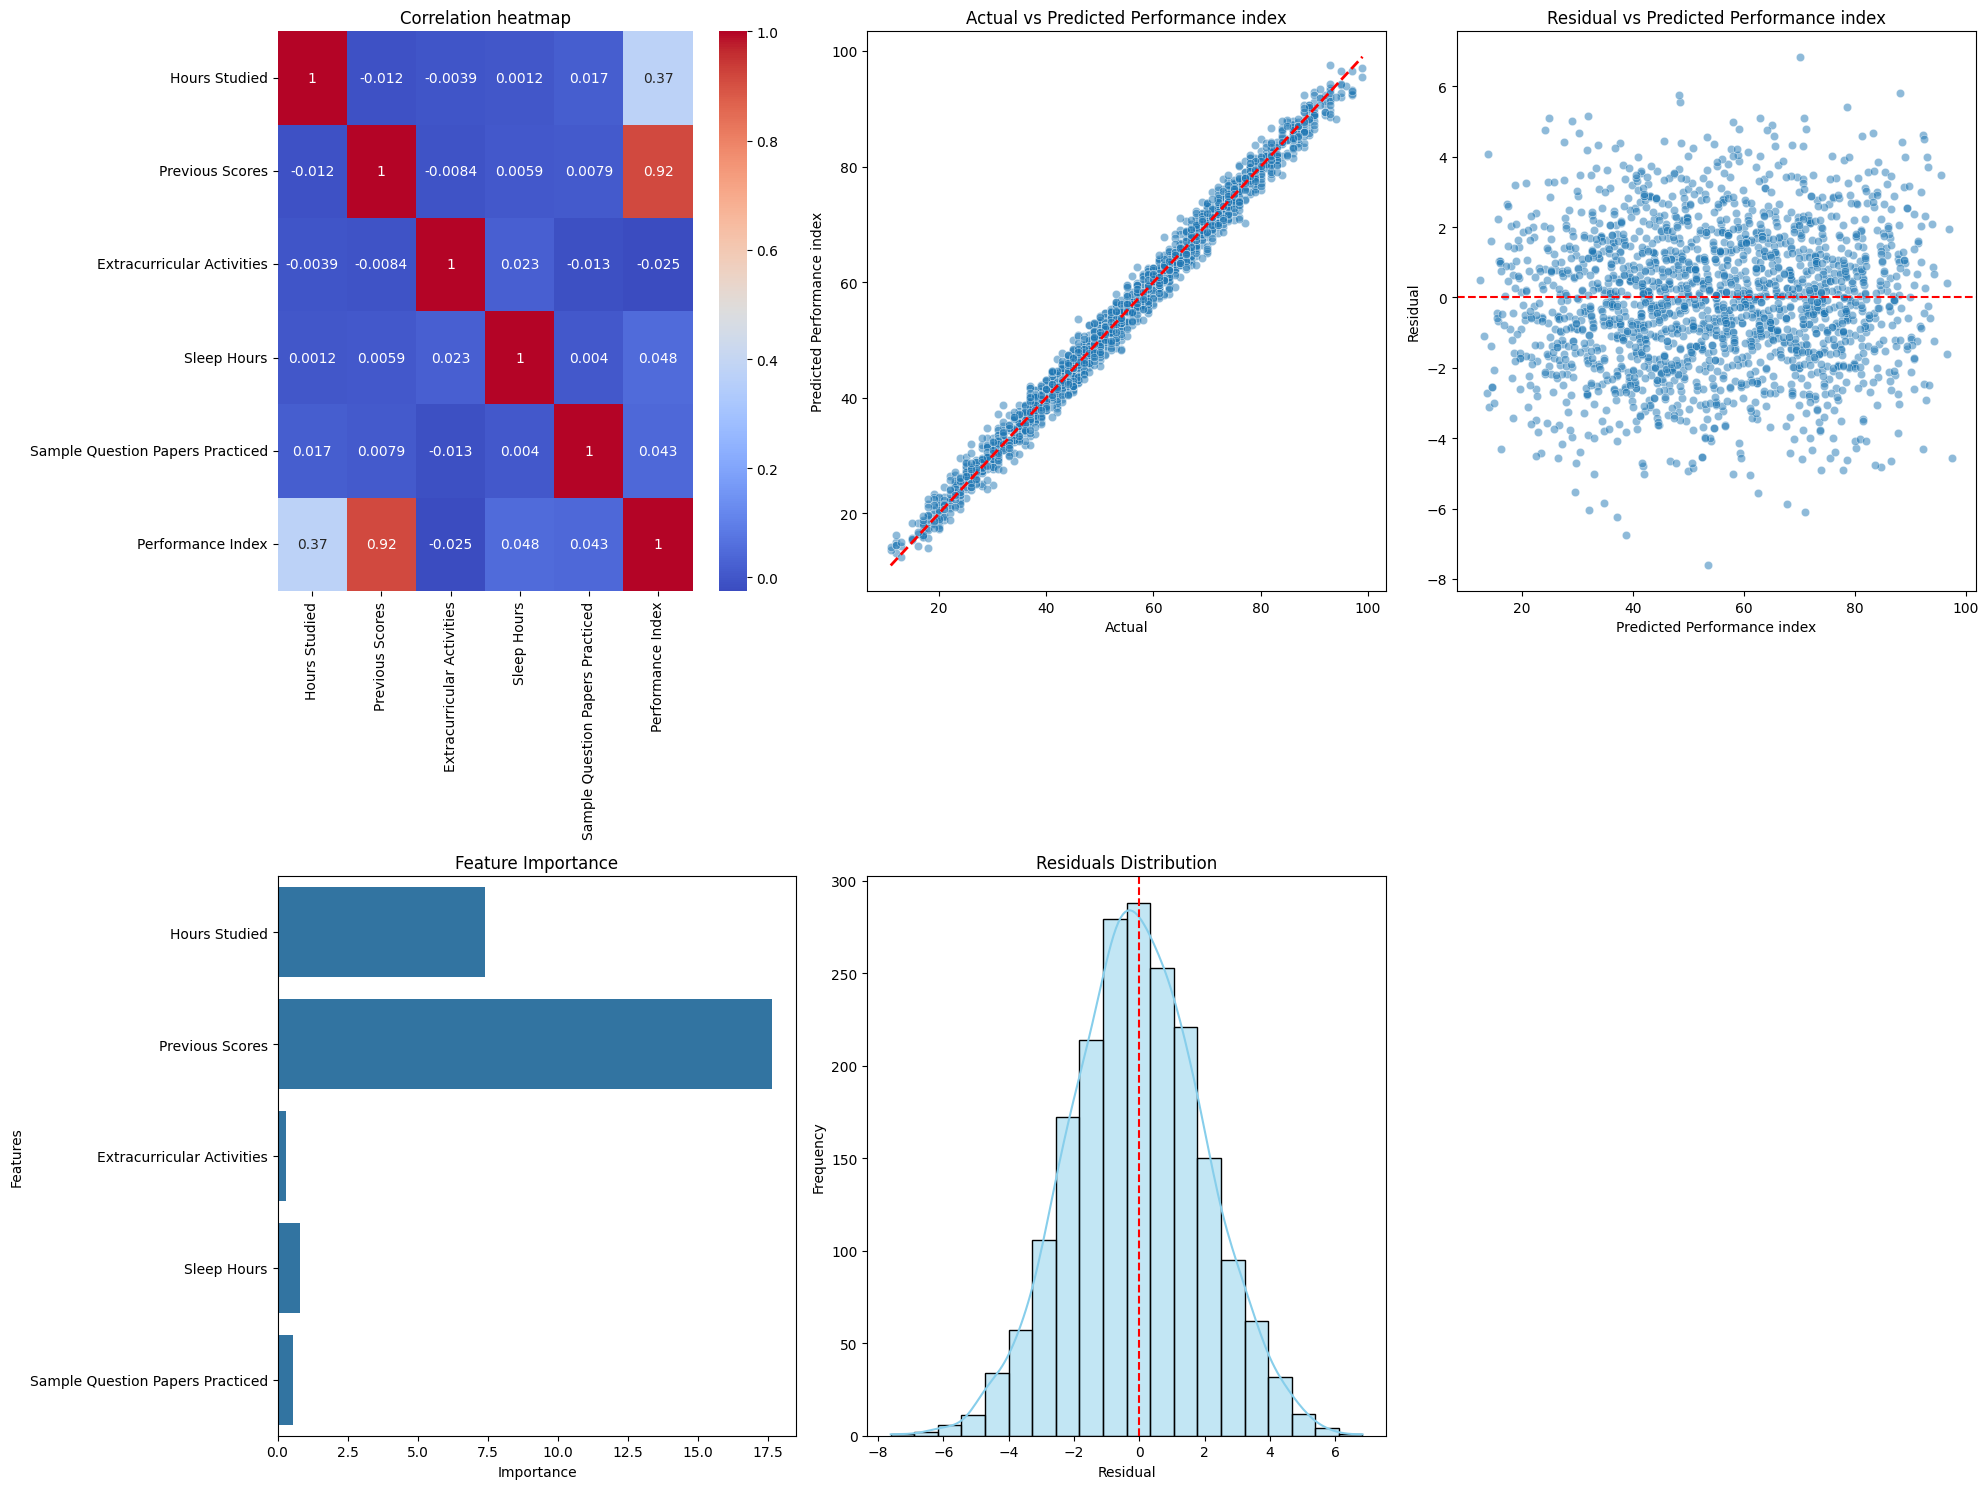

In [37]:
plt.figure(figsize=(20, 15))

# Correlation heatmap
correlation_matrix = df.corr()
plt.subplot(2, 3, 1)
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation heatmap")

# Scatter plot: Actual vs Predicted
plt.subplot(2, 3, 2)
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.5)
sns.lineplot(
    x=[y_test.min(), y_test.max()],
    y=[y_test.min(), y_test.max()],
    color="r",
    linestyle="--",
    lw=2,
)
plt.xlabel("Actual")
plt.ylabel("Predicted Performance index")
plt.title("Actual vs Predicted Performance index")

# Residual scatter plot
plt.subplot(2, 3, 3)
residuals = y_test - y_test_pred
sns.scatterplot(x=y_test_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Predicted Performance index")
plt.ylabel("Residual")
plt.title("Residual vs Predicted Performance index")

# Feature importance
plt.subplot(2, 3, 4)
feature_importance = abs(model.coef_)
feature_columns = df.drop(
    "Performance Index", axis=1
).columns  # Exclude the target column
sns.barplot(x=feature_importance, y=feature_columns)
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance")

# Residual histogram
plt.subplot(2, 3, 5)
sns.histplot(residuals, kde=True, bins=20, color="skyblue")
plt.axvline(x=0, color="r", linestyle="--")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")

plt.tight_layout()
plt.savefig("Student_performance_regression_plots.png")
plt.show()